In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics import confusion_matrix,auc
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [73]:
df=pd.read_csv("/home/pranita/Documents/Anaconda/creditcard.csv")
print(df.shape)
print(df.head(5))

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128

In [74]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


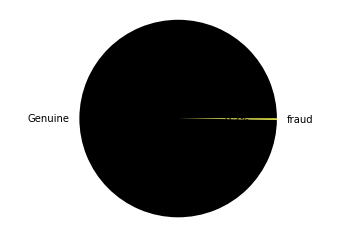

In [75]:
#check class variables that contarins zero for non fraud and 1 for fraud
fig,ax=plt.subplots(1,1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%',
       labels=["Genuine",'fraud'],
       colors=['black','yellow'])
plt.axis('equal')
plt.ylabel('')
plt.show()

In [76]:
#plot time to see if there is any trend
print("Time variable")

df['Time_Hr']=df["Time"]/3600
df['Time_Hr'].tail(5)

Time variable


284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64

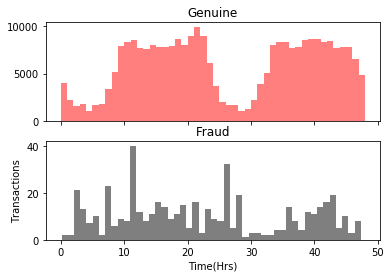

In [77]:
fig,(ax1,ax2)=plt.subplots(2,1, sharex=True,figsize=(6,4))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='red',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='black',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel("Time(Hrs)")
plt.ylabel("Transactions")
plt.show()

In [78]:
df=df.drop('Time',axis=1)

In [79]:
#preprocessing of dataset 'Amount'
from sklearn.preprocessing  import StandardScaler 
df['scaled_Amount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df=df.drop('Amount',axis=1)

/home/pranita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


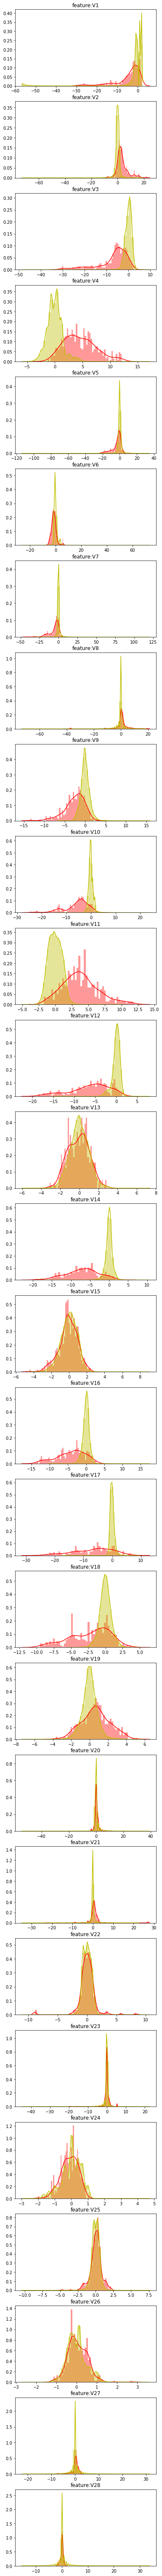

In [80]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs=gridspec.GridSpec(28,1)
plt.figure(figsize=(6,28*4))
for i,col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5=plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1],bins=50, color='r')
    sns.distplot(df[col][df.Class == 0],bins=50, color='y')
    ax5.set_xlabel('')
    ax5.set_title('feature:'+ str(col))
plt.show()

In [82]:
from sklearn.naive_bayes import GaussianNB
y=df['Class'].values
x=df.drop(['Class'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)
gauNB =GaussianNB()
gauNB.fit(x_train,y_train)
y_pred=gauNB.predict(x_test)
print(y_pred)
y_pred_prob=gauNB.predict_proba(x_test)
print(y_pred_prob)
g_acc=gauNB.score(x_test,y_test)
print(g_acc)


[0 0 1 ... 0 0 0]
[[1.00000000e+00 1.94414845e-17]
 [1.00000000e+00 2.33418489e-12]
 [3.81200558e-02 9.61879944e-01]
 ...
 [1.00000000e+00 1.48169798e-17]
 [1.00000000e+00 8.48836888e-18]
 [1.00000000e+00 6.54925798e-16]]
0.9764053228468101


In [83]:
df1=pd.read_csv("/home/pranita/Documents/Anaconda/creditcard.csv")
print(df1.shape)
print(df1.head(5))


(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128

In [84]:
y=df1['Class'].values
x=df1.drop(['V8','V13','V15','V20','V28','V27','V26','V25','V24','V23','V22','Class'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)
gauNB =GaussianNB()
gauNB.fit(x_train,y_train)
y_pred=gauNB.predict(x_test)
print(y_pred)
y_pred_prob=gauNB.predict_proba(x_test)
print(y_pred_prob)
g_acc=gauNB.score(x_test,y_test)
print(g_acc)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[0 0 0 ... 0 0 0]
[[1.00000000e+00 1.32847055e-12]
 [1.00000000e+00 1.01559186e-10]
 [9.99999535e-01 4.64630988e-07]
 ...
 [1.00000000e+00 6.27902291e-13]
 [1.00000000e+00 9.19685730e-13]
 [1.00000000e+00 8.13870504e-12]]
0.9934342193040975
[[56521   343]
 [   31    67]]
